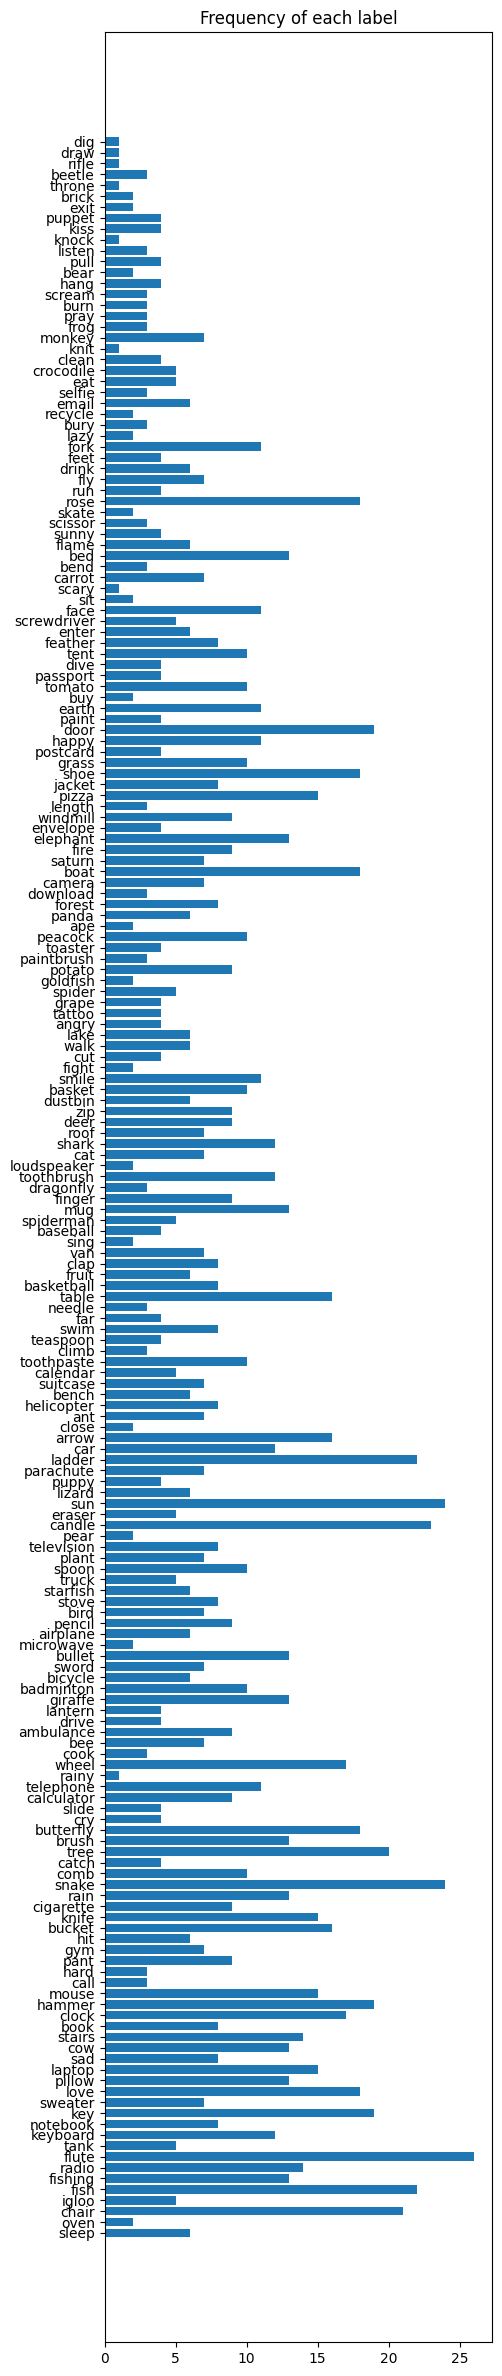

******************************************
Best triplet of hyperparameters: 
Best K:  13
Best distance metric:  manhattan
Best encoder:  VIT
******************************************
************  Top 20 KNN Scores based on accuracy *********
    F1 Score  Accuracy  Precision    Recall                  Parameters
0   0.178442  0.296667   0.535010  0.345321        [13, manhattan, VIT]
1   0.165041  0.280000   0.452463  0.368919         [3, manhattan, VIT]
2   0.153660  0.270000   0.425531  0.368103         [3, euclidean, VIT]
3   0.145217  0.270000   0.554867  0.299302        [21, manhattan, VIT]
4   0.155767  0.266667   0.446613  0.355970         [5, manhattan, VIT]
5   0.153993  0.266667   0.465476  0.342139         [8, manhattan, VIT]
6   0.149442  0.263333   0.444241  0.341320         [5, euclidean, VIT]
7   0.147723  0.256667   0.482191  0.337337        [13, euclidean, VIT]
8   0.137065  0.253333   0.441930  0.328632         [8, euclidean, VIT]
9   0.136543  0.253333   0.543279  0

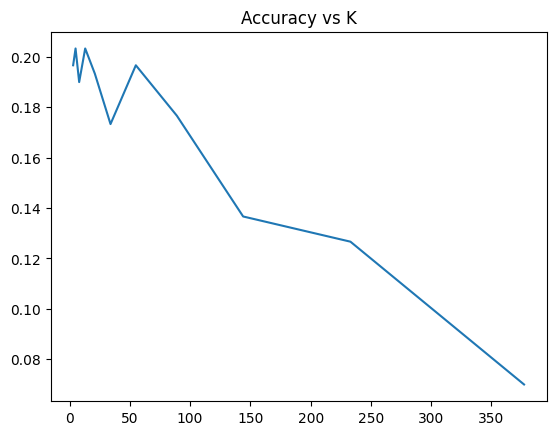

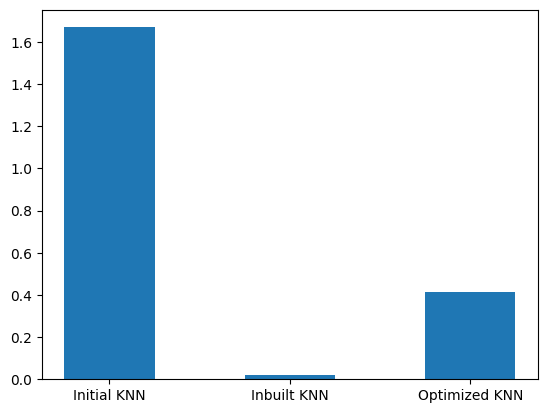

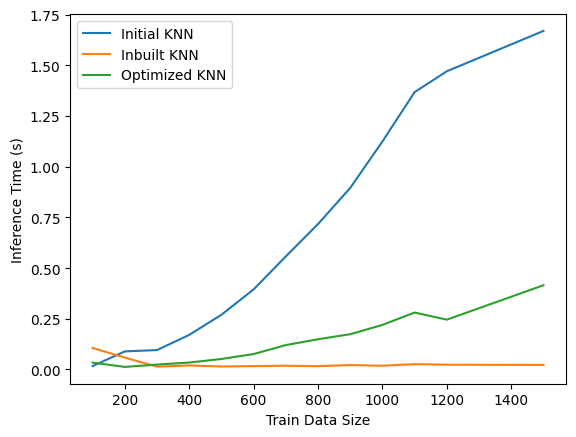

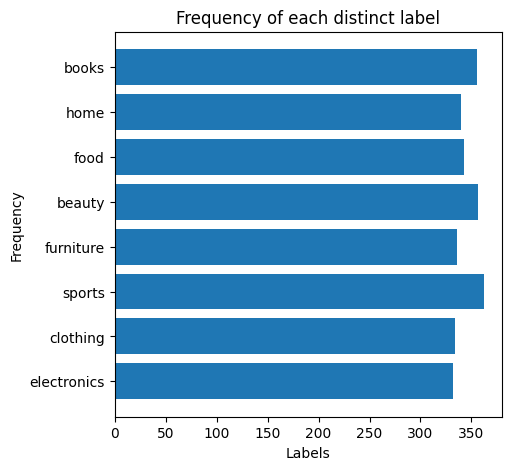

Confusion matrix for powerset with 3 3 gini  as hyperparameters:
[[0 0 0 ... 0 0 0]
 [4 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
Confusion matrix for multilabel with 3 3 gini as hyperparameters:
[[63  0  0  0  0  0  0  0]
 [48  0  0  0  0  0  0  0]
 [39  0  0  0  0  0  0  0]
 [20  0  0  0  0  0  0  0]
 [14  0  0  0  0  0  0  0]
 [ 7  0  0  0  0  0  0  0]
 [ 8  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0]]
Confusion matrix for powerset with 3 3 entropy  as hyperparameters:
[[0 0 0 ... 0 0 0]
 [4 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
Confusion matrix for multilabel with 3 3 entropy as hyperparameters:
[[63  0  0  0  0  0  0  0]
 [48  0  0  0  0  0  0  0]
 [39  0  0  0  0  0  0  0]
 [20  0  0  0  0  0  0  0]
 [14  0  0  0  0  0  0  0]
 [ 7  0  0  0  0  0  0  0]
 [ 8  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0]]
Confusion matrix for powerset with 3 5 gini  as hyperparam

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from knnoptimized import createKNNOptimized
from knninitial import createKNNInitial
from custromdecisiontree import CustomDecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, make_scorer
import itertools    
from sklearn.neighbors import KNeighborsClassifier
import time

data = np.load('data.npy', allow_pickle=True)

####################### 
# Finding the frequency of each label
emptyDict = dict() 
for row in data:
   emptyDict[row[3]]=emptyDict.get(row[3], 0)+1

keys = list(emptyDict.keys())
frequencies = list(emptyDict.values())
 
# Plotting the frequency of each label
fig = plt.figure(figsize = (5, 30))
plt.title("Frequency of each label")
plt.barh(keys, frequencies)
plt.show()
#######################

#######################
# Extracting the features and labels
X = data[:, 1:3]
y = data[:, 3]

# Splitting the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

K = [3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377]
distance_metric = ['euclidean', 'manhattan', 'cosine_distance']
encoder_type = ['ResNet', 'VIT']

scores = []
accuracy_plot = []
check = False

# Finding the best KNN model by iterating over all the possible combinations of hyperparameters
for d in distance_metric:
    for encoder in encoder_type:
        for k in K:
            kNN = createKNNOptimized(k, X_train, y_train, d, encoder)
            f1, accuracy, precision, recall = kNN.evaluate(X_val, y_val)
            if(check == False):
                accuracy_plot.append(accuracy)
            scores.append([[k, d, encoder], f1, accuracy, precision, recall])  
        check = True

# Sorting the scores based on the accuracy
scores.sort(key=lambda x: x[2], reverse=True)
top20_KNN = scores[:20]

parameter_list = [row[0] for row in top20_KNN]
f1_scores_list = [row[1] for row in top20_KNN]
accuracy_list = [row[2] for row in top20_KNN]
precision_list = [row[3] for row in top20_KNN]
recall_list = [row[4] for row in top20_KNN]

print("******************************************")
print("Best triplet of hyperparameters: ")
print("Best K: ", parameter_list[0][0])
print("Best distance metric: ", parameter_list[0][1])
print("Best encoder: ", parameter_list[0][2])
print("******************************************")

print("************  Top 20 KNN Scores based on accuracy *********")
top20_data = {
    "F1 Score": f1_scores_list,
    "Accuracy": accuracy_list,
    "Precision": precision_list,
    "Recall": recall_list,
    "Parameters": parameter_list
}
df = pd.DataFrame(top20_data)
print(df)

# Plotting the accuracy vs K graph
plt.plot(K, accuracy_plot)
plt.title("Accuracy vs K")
plt.show()
######################

######################
# Values of Hyperparameters plotting inference time graphs
test_k_for_timeinf = 13
test_d_for_timeinf = 'manhattan'
test_encoder_for_timeinf = 'VIT'

data_sizes = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1500]

inference_list_initial_knn = []
inference_list_inbuilt_knn = []
inference_list_optimized_knn = []

# Finding the inference time for each model
for data_size in data_sizes:
    X_train, X_val, y_train, y_val = train_test_split(X[:data_size], y[:data_size], test_size=0.2, random_state=42)

    start = time.time()
    initial_knn_model = createKNNInitial(test_k_for_timeinf, X_train, y_train, test_d_for_timeinf, test_encoder_for_timeinf)
    f1, accuracy, precision, recall = initial_knn_model.evaluate(X_val, y_val)
    end = time.time()
    model_time = (end - start)
    inference_list_initial_knn.append(model_time)

    start = time.time()
    inbuilt_knn_model = KNeighborsClassifier()
    vit_train_data = np.concatenate(X_train[:,1], axis=0)
    vit_val_data = np.concatenate(X_val[:, 1], axis=0)
    inbuilt_knn_model.fit(vit_train_data, y_train) #VIT Data
    y_pred = inbuilt_knn_model.predict(vit_val_data)
    end = time.time()
    model_time = (end - start)
    inference_list_inbuilt_knn.append(model_time)

    start = time.time()
    optimized_knn_model = createKNNOptimized(test_k_for_timeinf, X_train, y_train, test_d_for_timeinf, test_encoder_for_timeinf)
    f1, accuracy, precision, recall = optimized_knn_model.evaluate(X_val, y_val)
    end = time.time()
    model_time = (end - start)
    inference_list_optimized_knn.append(model_time)

inference_times = [inference_list_initial_knn, inference_list_inbuilt_knn, inference_list_optimized_knn]
inf_times_full_data = [inference_list_initial_knn[-1], inference_list_inbuilt_knn[-1], inference_list_optimized_knn[-1]]
labels = ['Initial KNN', "Inbuilt KNN" , "Optimized KNN"]

# Plotting the inference time vs model graph
plt.bar(labels, inf_times_full_data, width=0.5)
plt.show()

# Plotting the inference time vs train data size graph
for i in range(3):
    plt.plot(data_sizes, inference_times[i], label=labels[i])

plt.xlabel("Train Data Size")
plt.ylabel("Inference Time (s)")
plt.legend()
plt.show()
#######################

#######################
max_depth = [3,5,10,20,30]
max_features = [3,5,7,9,11]
criterion = ['gini', 'entropy']

# Reading the csv file
df = pd.read_csv('advertisement.csv')
df.to_numpy()

# Separating categorical and numerical columns
categorical_columns = ['gender', 'education', 'married', 'city', 'occupation', 'most bought item']
numerical_columns = ['age', 'income', 'purchase_amount', 'children']

# Finding the frequency of each distinct label
emptyDict_csv = dict() 
for index, row in df.iterrows():
   mult_labs = str.split(row[10])
   for s in mult_labs :
        emptyDict_csv[s]=emptyDict_csv.get(s, 0)+1

csv_keys = list(emptyDict_csv.keys())
csv_frequencies = list(emptyDict_csv.values())

# Plotting the frequency of each label
fig = plt.figure(figsize = (5, 5))

plt.barh(csv_keys, csv_frequencies)
plt.title("Frequency of each distinct label")
plt.xlabel("Labels")
plt.ylabel("Frequency")
plt.show()
######################

######################
# Creating the powerset of distinct labels
power_set = list(itertools.chain.from_iterable(itertools.combinations(csv_keys, r) for r in range(len(csv_keys) + 1)))
power_set_cleaned = [list(element) for element in power_set]
power_set_sorted = list(map(sorted, power_set_cleaned))
power_set_sorted.sort()
power_set_sorted.sort(key=lambda x: len(x))

y = df.iloc[:, 10] 

# Performing One-Hot Encoding of the nominal categorical columns
encoded_df_temp = pd.get_dummies(df[categorical_columns], columns=categorical_columns)
encoded_df = pd.concat([encoded_df_temp, df[numerical_columns]], axis=1)
num_records = y.shape[0]
num_power_set_elements = len(power_set_sorted)
indices_of_labels = {label: index for index, label in enumerate(csv_keys)}

# Creating the feature array for powerset and multilabel
feature_array_powerset = np.zeros((num_records, num_power_set_elements))
feature_array_multilabel = np.zeros((num_records, len(csv_keys)))

# Filling the feature arrays with data
cnt_powerset = 0
for row in y:
    labels = str.split(row) 
    labels.sort()
    lab_idx = power_set_sorted.index(labels)
    feature_array_powerset[cnt_powerset][lab_idx] = 1
    cnt_powerset=cnt_powerset+1

cnt_multilabel = 0
for row in y:
    labels = str.split(row) 
    indices = [indices_of_labels[label] for label in labels]
    for idx in indices:
        feature_array_multilabel[cnt_multilabel][idx] = 1
    cnt_multilabel=cnt_multilabel+1

# Splitting the data into train and validation sets
encoded_train_powerset, encoded_val_powerset, y_train_powerset, y_val_powerset = train_test_split(encoded_df, feature_array_powerset, test_size=0.2, random_state=42)
encoded_train_multilabel, encoded_val_multilabel, y_train_multilabel, y_val_multilabel = train_test_split(encoded_df, feature_array_multilabel, test_size=0.2, random_state=42)

power_scores = []
multi_scores = []

# Finding the best decision tree model by iterating over all the possible combinations of hyperparameters
for depth in max_depth:
    for feature in max_features:
        for criteria in criterion: 
            powerset_classifier = CustomDecisionTreeClassifier(max_depth=depth, max_features=feature, criterion=criteria)
            powerset_classifier.fit(encoded_train_powerset, y_train_powerset)
            f1_power, accuracy_power, precision_power, recall_power, cm_power = powerset_classifier.evaluate(encoded_val_powerset, y_val_powerset)
            print("Confusion matrix for powerset with", depth, feature, criteria, " as hyperparameters:")
            print(cm_power)
           
            power_scores.append([[depth, feature, criteria], f1_power, accuracy_power, precision_power, recall_power, [cm_power]]) 

            multioutput_classifier = CustomDecisionTreeClassifier(max_depth=depth, max_features=feature, criterion=criteria)
            multioutput_classifier.fit(encoded_train_multilabel, y_train_multilabel)
            f1_multi, accuracy_multi, precision_multi, recall_multi, cm_multi = multioutput_classifier.evaluate(encoded_val_multilabel, y_val_multilabel)
            print("Confusion matrix for multilabel with", depth, feature, criteria, "as hyperparameters:")
            print(cm_multi)
            multi_scores.append([[depth, feature, criteria], f1_multi, accuracy_multi, precision_multi, recall_multi, [cm_multi]])
           
power_scores_sorted = sorted(power_scores, key=lambda x: x[1], reverse=True)
multi_scores_sorted = sorted(multi_scores, key=lambda x: x[1], reverse=True)
######################

######################
# Printing the scores of all the models
parameter_list_power = [row[0] for row in power_scores_sorted]
f1_scores_list_power = [row[1] for row in power_scores_sorted]
accuracy_list_power = [row[2] for row in power_scores_sorted]
precision_list_power = [row[3] for row in power_scores_sorted]
recall_list_power = [row[4] for row in power_scores_sorted]

print("************  Powerset Scores  *********")
powerscores_data = {
    "F1 Score": f1_scores_list_power,
    "Accuracy": accuracy_list_power,
    "Precision": precision_list_power,
    "Recall": recall_list_power,
    "Parameters": parameter_list_power,
}
df = pd.DataFrame(powerscores_data)
print(df)

parameter_list_multi = [row[0] for row in multi_scores_sorted]
f1_scores_list_multi = [row[1] for row in multi_scores_sorted]
accuracy_list_multi = [row[2] for row in multi_scores_sorted]
precision_list_multi = [row[3] for row in multi_scores_sorted]
recall_list_multi = [row[4] for row in multi_scores_sorted]

print("************  Multilabel Scores  *********")
multiscores_data = {
    "F1 Score": f1_scores_list_multi,
    "Accuracy": accuracy_list_multi,
    "Precision": precision_list_multi,
    "Recall": recall_list_multi,
    "Parameters": parameter_list_multi,
}
df = pd.DataFrame(multiscores_data)
print(df)

# Printing the top 3 models
top3_powerset = power_scores_sorted[:3]
top3_multilabel = multi_scores_sorted[:3]

top3_power_parameter_list = [row[0] for row in top3_powerset]
top3_power_f1_scores_list = [row[1] for row in top3_powerset]
top3_power_accuracy_list = [row[2] for row in top3_powerset]
top3_power_precision_list = [row[3] for row in top3_powerset]
top3_power_recall_list = [row[4] for row in top3_powerset]

print("Top 3 performing powerset models according to f1_score:")
top3_data_powerset = {
    "F1 Score": top3_power_f1_scores_list,
    "Accuracy": top3_power_accuracy_list,
    "Precision": top3_power_precision_list,
    "Recall": top3_power_recall_list,
    "Parameters": top3_power_parameter_list
}
power_df = pd.DataFrame(top3_data_powerset)
print(power_df)

top3_multi_parameter_list = [row[0] for row in top3_multilabel]
top3_multi_f1_scores_list = [row[1] for row in top3_multilabel]
top3_multi_accuracy_list = [row[2] for row in top3_multilabel]
top3_multi_precision_list = [row[3] for row in top3_multilabel]
top3_multi_recall_list = [row[4] for row in top3_multilabel]

print("Top 3 performing multilabel models according to f1_score:")
top3_data_multilabel = {
    "F1 Score": top3_multi_f1_scores_list,
    "Accuracy": top3_multi_accuracy_list,
    "Precision": top3_multi_precision_list,
    "Recall": top3_multi_recall_list, 
    "Parameters": top3_multi_parameter_list
}
multi_df = pd.DataFrame(top3_data_powerset)
print(multi_df)
######################

######################
# Performing K-Fold Cross Validation on the best powerset model
best_depth = power_scores_sorted[0][0][0]
best_feature = power_scores_sorted[0][0][1]
best_criteria = power_scores_sorted[0][0][2]
scoring_metric = make_scorer(accuracy_score)

power_clf = CustomDecisionTreeClassifier(max_depth=best_depth, max_features=best_feature, criterion=best_criteria)

k_folds = KFold(n_splits=6, shuffle=True, random_state=42)
scores = cross_val_score(power_clf, encoded_train_powerset, y_train_powerset, cv = k_folds, scoring=scoring_metric)
print("************  Cross Validation Scores  *********")
print(scores)
print("Average CV Score: ", scores.mean())
######################
